In [6]:
from pathlib import Path
import re
import numpy as np

subs = []
fc = []
field = 25753
scan = 3
j = 0

basedir = '/run/media/anton/AntonData1/UKB_MRI_data_11092022/'

for i,f in enumerate(Path(f'{basedir}/UKB_MRI/{field}').iterdir()):
    match = re.match(f'(\d+)_(\d+)_{scan}_0.txt', f.name)
    if not match:
        continue
    sub = match.group(1)
    field = match.group(2)
    data = np.genfromtxt(str(f))
    fc.append(data)
    subs.append(sub)
    j += 1
    if j % 1000 == 0:
        print(f'Done {j}')
    
print('Complete')

Done 1000
Done 2000
Complete


In [7]:
# Write to file to load more quickly

import pickle

dct = {}

for i in range(len(subs)):
    dct[int(subs[i])] = fc[i]

pickle.dump(dct, open(f'{basedir}/{field}_{scan}.pkl', 'wb'))

print(len(dct))
print('Complete')

2896
Complete


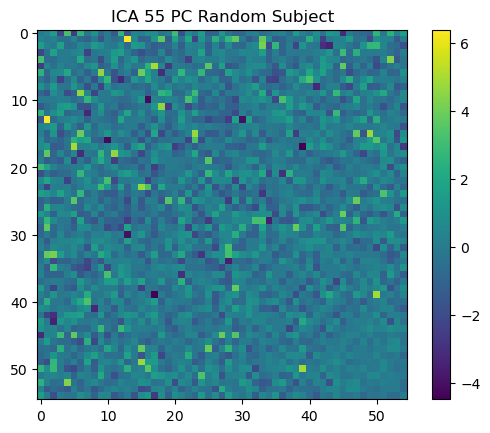

In [18]:
# Check out some of the FCs

from random import randint
import random
import matplotlib.pyplot as plt
import numpy as np

N = 55

def vec2mat(v, N):
    a,b = np.triu_indices(N,1)
    m = np.zeros((N,N))
    m[a,b] = v
    return m+m.T

# plt.imshow(vec2mat(fc[randint(0,len(fc)-1)], N))
plt.title('ICA 55 PC Random Subject')
plt.imshow(vec2mat(fc[random.choice(list(fc.keys()))], N))
plt.colorbar()
plt.show()

In [1]:
import numpy as np
from pathlib import Path
import re

scan = 2
basedir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/UKB/partial/'

fc = dict()

for i,partial in enumerate(Path(basedir).iterdir()):
    match = re.match('(\d+)_task-(\d+)-(\d)_partial.npy', partial.name)
    sub = int(match.group(1))
    scn = int(match.group(3))
    if scn != scan:
        continue
    fc[sub] = np.load(str(partial))
    if i % 1000 == 0:
        print(f'Done {i}')
    
print(len(fc))

Done 0
Done 1000
Done 2000
Done 3000
Done 4000
Done 5000
Done 6000
Done 7000
Done 8000
Done 9000
Done 10000
Done 11000
Done 12000
Done 13000
Done 14000
Done 15000
Done 17000
Done 18000
Done 19000
Done 20000
Done 21000
Done 23000
Done 24000
Done 25000
Done 26000
Done 27000
Done 28000
Done 29000
Done 30000
Done 31000
Done 32000
Done 33000
Done 34000
Done 35000
Done 36000
Done 37000
Done 38000
Done 39000
Done 40000
Done 41000
Done 42000
Done 43000
40626


In [1]:
import pickle

field = 25753
scan = 2

basedir = '/run/media/anton/AntonData1/UKB_MRI_data_11092022/'

fc = pickle.load(open(f'{basedir}/{field}_{scan}.pkl', 'rb'))

print(len(fc))

40471


In [2]:
# Read the phenotype info

import pandas as pd

csvname = '/run/media/anton/AntonData1/UKB_MRI_data_11092022/UKB_Phenotypes/project3_Anton/DataSet_11162022.csv'
df = pd.read_csv(csvname)
df

,f.eid,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.21022.0.0,f.22001.0.0,f.25750.2.0,f.25750.3.0,f.25751.2.0,f.25751.3.0,f.25752.2.0,f.25752.3.0,f.25753.2.0,f.25753.3.0,f.25754.2.0,f.25754.3.0,f.25755.2.0,f.25755.3.0
0,1000010,50.0,NaN,NaN,NaN,50.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000028,52.0,NaN,NaN,NaN,52.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000034,56.0,NaN,NaN,NaN,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000045,43.0,NaN,NaN,NaN,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000052,61.0,NaN,NaN,NaN,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502481,6024820,68.0,NaN,NaN,NaN,68.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502482,6024833,61.0,NaN,NaN,NaN,61.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502483,6024847,64.0,NaN,NaN,NaN,64.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502484,6024859,60.0,NaN,NaN,NaN,60.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from math import isnan
import numpy as np

ages = []
sex = []
x = []

for i,s in enumerate(fc.keys()):
    try:
        sex.append(float(df[df['f.eid'] == s]['f.22001.0.0']))
        ages.append(float(df[df['f.eid'] == s]['f.21003.2.0']))
        x.append(fc[s])
    except:
        continue

ages = np.array(ages)
sex = np.array(sex)
x = np.stack(x)

print(x.shape, ages.shape, sex.shape)

(40626, 34716) (40626,) (40626,)


In [32]:
sex

array([1., 0., 1., ..., 0., 0., 0.])

In [4]:
import sys

latsimdir = '/home/anton/Documents/Tulane/Research/LatentSimilarity'

if latsimdir not in sys.path:
    sys.path.append(latsimdir)

In [5]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
# from latsim import LatSimClf, LatSimReg
import warnings
warnings.filterwarnings("ignore")

def rmse(xhat, x):
    return np.mean((xhat-x)**2)**0.5

errs = []
nullerrs = []

for N in [100, 200, 500, 1000, 3000, 5000]:
# for N in [3000]:
    # N = 40000

    for _ in range(20):
        xtr, xt, ytr, yt = train_test_split(x[:N], ages[:N], train_size=0.8)
#         print('Done split')

        # mu = np.mean(ytr)
        # yt = yt-mu
        # ytr = ytr-mu

    #     reg = LatSimReg(lr=1e-2).fit(xtr, ytr)
        reg = Ridge(alpha=10).fit(xtr, ytr)
    #     reg = LatSimClf(lr=1e-2).fit(xtr, ytr)
#         reg = LogisticRegression(max_iter=1000).fit(xtr, ytr)
        yhat = reg.predict(xt)
        err = rmse(yhat, yt)
        nullerr = rmse(np.mean(ytr), yt)
#         err = np.mean(yhat == yt)
#         nullerr = np.mean(yt)
#         if nullerr < 0.5:
#             nullerr = 1-nullerr
#         print(err)
#         print(nullerr)
        errs.append(err)
        nullerrs.append(nullerr)
    
    print(np.mean(errs), np.std(errs))
    print(np.mean(nullerrs), np.std(nullerrs))

6.988026050171335 0.7981012468335205
7.059096809608812 0.8084827889761891
7.09508254791495 0.7211386547813892
7.2188045655340405 0.7335203138801859
7.187144347367736 0.6173931437284426
7.3427681381414365 0.6430230739729411
7.183423616957592 0.5463336775373694
7.441300284545671 0.5919561528857205
7.079908241058229 0.5338263210886569
7.500325908983869 0.5473016418304619
6.991530867550311 0.527731598534065
7.5414492959318125 0.5102222143688177
